## [통계적머신러닝] 과제7
통계학과 2019150419 기다연<br>
2021.10.21

### 문제1.
선형 SVM에서 c값의 변화에 따른 accuracy의 변화와 과대적합에 미치는 영향을 논의하라.
- c : 정규화 매개변수. c가 작을수록 정규화 강도가 커짐. (L2), c가 작을수록 규제, 클수록 overfitting
- c는 양수의 부동 소숫점이어야 함.

In [1]:
import seaborn as sns
iris=sns.load_dataset('iris') # iris data 불러오기
X=iris.drop('species',axis=1) # 특성변수만으로 구성된 X data Frame 생성
y=iris['species']             # 분류의 목적 변수만으로 구성된 y data Frame생성

from sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)#범주형 변수 숫자로 치환

from sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

from sklearn.preprocessing import StandardScaler #data의 표준화 함수 호출
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [2]:
from sklearn import metrics
from sklearn.svm import SVC # SVM함수의 호출

In [35]:
for i in range (1,6):
    svm = SVC(kernel='linear',
              C=i,
              random_state=1)  # 선형 SVM
    svm.fit(X_train,y_train) # SVM추정
    y_train_pred=svm.predict(X_train) # train set의 y 예측치 구하기
    y_test_pred=svm.predict(X_test)  # test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Linear SVM(c=%d) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Linear SVM(c=1) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9777777777777777
Linear SVM(c=2) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9777777777777777
Linear SVM(c=3) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9777777777777777
Linear SVM(c=4) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333
Linear SVM(c=5) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333


[]

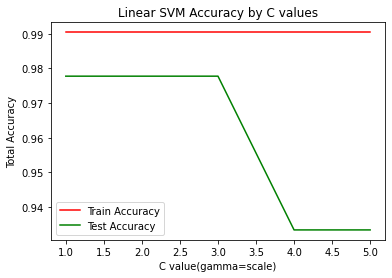

In [60]:
# rbf, gamma = scale
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

c_list = [1,2,3,4,5]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='linear',C=x,random_state=1, gamma='scale')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('C value(gamma=scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Linear SVM Accuracy by C values')
plt.plot() # Show graph

### 문제2.
교재의 비선형 SVM 모형(p158)에서 kenel='rbf', 'poly', 'sigmoid'으로 변경하고 c와 gamma를 변경하여 accuracy와 과대적합에 미치는 영향을 논의하라.

#### rbf

In [38]:
# Kernel SVM (비선형인 경우에 사용)
# rbf (방사형기저함수) + c값 변화
for i in range(1,6):
    ksvm = SVC(kernel='rbf',
               C=i,
               gamma=0.2,
               random_state=1)  # rbf: 방사형기저함수
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(rbf) (c=%d) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(rbf) (c=1) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (c=2) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (c=3) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (c=4) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9777777777777777
Kernal SVM(rbf) (c=5) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9777777777777777


[]

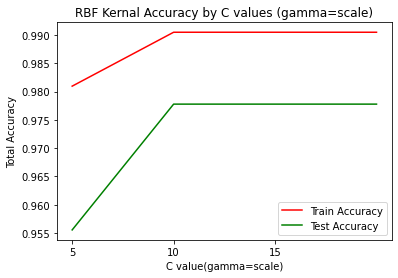

In [71]:
c_list = [1,5,10,15]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='rbf',C=x,random_state=1, gamma='scale')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('C value(gamma=scale)') # Label x-axis
plt.xticks(list(range(len(c_list))), c_list)
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('RBF Kernal Accuracy by C values (gamma=scale)')
plt.plot() # Show graph

In [29]:
# Kernel SVM (비선형인 경우에 사용)
# rbf (방사형기저함수) + gamma값 변화
import numpy
gamma_list = numpy.arange(0.1, 0.6, 0.1)

for i in gamma_list:
    ksvm = SVC(kernel='rbf',
               C=1.0,
               gamma=i,
               random_state=1)  # rbf: 방사형기저함수
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(rbf) (gamma=%0.1f) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(rbf) (gamma=0.1) 
 Train Accuracy: 0.9809523809523809 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (gamma=0.2) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (gamma=0.3) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (gamma=0.4) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(rbf) (gamma=0.5) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556


[]

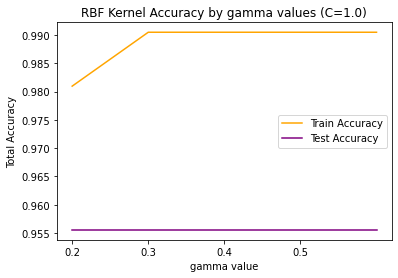

In [65]:
gamma_list = [.1, .2, .3, .4, .5]

train_errors = [] 
test_errors = [] 

for x in gamma_list:
    dtc=SVC(kernel='rbf',C=1.0,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(gamma_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='orange') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='purple') # Plot testing error over domain
plt.xlabel('gamma value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.xticks(list(range(len(gamma_list))), gamma_list)
plt.legend() # Show plot labels as legend
plt.title('RBF Kernel Accuracy by gamma values (C=1.0)')
plt.plot() # Show graph

#### poly

In [30]:
# Kernel SVM (비선형인 경우에 사용)
# poly (p차 다항함수) + c값 변화
for i in range(1,10):
    ksvm = SVC(kernel='poly',
               C=i,
               gamma=0.2,
               random_state=1)
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(poly) (c=%d) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(poly) (c=1) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (c=2) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (c=3) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (c=4) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (c=5) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (c=6) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333
Kernal SVM(poly) (c=7) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333
Kernal SVM(poly) (c=8) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333
Kernal SVM(poly) (c=9) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333


[]

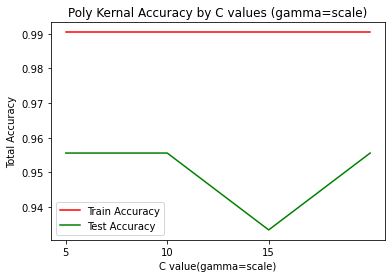

In [72]:
c_list = [1,5,10,15]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='poly',C=x,random_state=1, gamma='scale')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('C value(gamma=scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.xticks(list(range(len(c_list))), c_list)
plt.legend() # Show plot labels as legend
plt.title('Poly Kernal Accuracy by C values (gamma=scale)')
plt.plot() # Show graph

In [31]:
# Kernel SVM (비선형인 경우에 사용)
# poly (p차 다항함수) + gamma값 변화
import numpy
gamma_list = numpy.arange(0.1, 0.6, 0.1)

for i in gamma_list:
    ksvm = SVC(kernel='poly',
               C=1.0,
               gamma=i,
               random_state=1)
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(poly) (gamma=%0.1f) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(poly) (gamma=0.1) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (gamma=0.2) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (gamma=0.3) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9555555555555556
Kernal SVM(poly) (gamma=0.4) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333
Kernal SVM(poly) (gamma=0.5) 
 Train Accuracy: 0.9904761904761905 
 Test Accuracy: 0.9333333333333333


[]

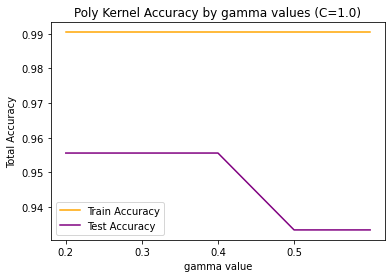

In [74]:
gamma_list = [.1, .2, .3, .4, .5]

train_errors = [] 
test_errors = [] 

for x in gamma_list:
    dtc=SVC(kernel='poly',C=1.0,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(gamma_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='orange') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='purple') # Plot testing error over domain
plt.xlabel('gamma value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.xticks(list(range(len(gamma_list))), gamma_list)
plt.legend() # Show plot labels as legend
plt.title('Poly Kernel Accuracy by gamma values (C=1.0)')
plt.plot() # Show graph

#### sigmoid

In [32]:
# Kernel SVM (비선형인 경우에 사용)
# sigmoid (시그모이드) + c값 변화
for i in range(1,10):
    ksvm = SVC(kernel='sigmoid',
               C=i,
               gamma=0.2,
               random_state=1)
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(sigmoid) (c=%d) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(sigmoid) (c=1) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=2) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=3) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=4) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=5) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=6) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=7) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=8) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (c=9) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446


[]

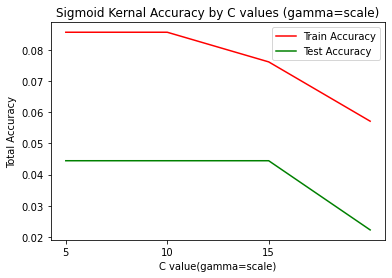

In [75]:
c_list = [1,5,10,15]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='sigmoid',C=x,random_state=1, gamma='scale')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('C value(gamma=scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.xticks(list(range(len(c_list))), c_list)
plt.legend() # Show plot labels as legend
plt.title('Sigmoid Kernal Accuracy by C values (gamma=scale)')
plt.plot() # Show graph

In [33]:
# Kernel SVM (비선형인 경우에 사용)
# sigmoid (시그모이드) + gamma값 변화
import numpy
gamma_list = numpy.arange(0.1, 0.6, 0.1)

for i in gamma_list:
    ksvm = SVC(kernel='sigmoid',
               C=1.0,
               gamma=i,
               random_state=1)
    # 감마가 클수록 과적합될 가능성이 높아지므로 감마를 좀 더 감소할 필요가 있음
    ksvm.fit(X_train,y_train)

    y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
    y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)   # train set의 accuracy ratio
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)    # test set의 accuracy ratio
    print('Kernal SVM(sigmoid) (gamma=%0.1f) \n Train Accuracy: %s \n Test Accuracy: %s' % (i, train_accuracy, test_accuracy))

Kernal SVM(sigmoid) (gamma=0.1) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (gamma=0.2) 
 Train Accuracy: 0.06666666666666667 
 Test Accuracy: 0.044444444444444446
Kernal SVM(sigmoid) (gamma=0.3) 
 Train Accuracy: 0.3333333333333333 
 Test Accuracy: 0.3333333333333333
Kernal SVM(sigmoid) (gamma=0.4) 
 Train Accuracy: 0.3333333333333333 
 Test Accuracy: 0.3333333333333333
Kernal SVM(sigmoid) (gamma=0.5) 
 Train Accuracy: 0.3333333333333333 
 Test Accuracy: 0.3333333333333333


[]

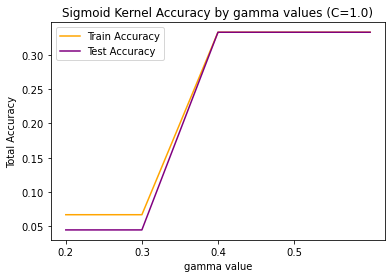

In [76]:
gamma_list = [.1, .2, .3, .4, .5]

train_errors = [] 
test_errors = [] 

for x in gamma_list:
    dtc=SVC(kernel='sigmoid',C=1.0,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(gamma_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Train Accuracy', color='orange') # Plot training error over domain
plt.plot(x, test_errors, label='Test Accuracy', color='purple') # Plot testing error over domain
plt.xlabel('gamma value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.xticks(list(range(len(gamma_list))), gamma_list)
plt.legend() # Show plot labels as legend
plt.title('Sigmoid Kernel Accuracy by gamma values (C=1.0)')
plt.plot() # Show graph